## Gordon Biersch Brewery
### How does media affect same store sales, conversions and redemption
#### IMM Data Analytics & Decision Sciences

In [676]:
# Import Packages
import pandas as pd
import numpy as np
import xlrd
#import pandoc
import matplotlib
import matplotlib.pyplot as plt

In [677]:
coupon = pd.read_excel('PromoSSSImpactGB.xlsx', sheet_name = '30offpromoGB',
                                index_col=None, na_values=['NA'], usecols = "A:J",
                                skiprows= 2)

coupon.head()

,Imputed SSS Impact*,2018-01-29 00:00:00,2018-02-05 00:00:00,2018-02-12 00:00:00,2018-02-19 00:00:00,2018-02-26 00:00:00,2018-03-05 00:00:00,2018-03-12 00:00:00,2018-03-19 00:00:00,2018-03-26 00:00:00
0,GB Annapolis,0.000624603,0.00117705,0.00699697,0.00757242,0.0147161,0.0126507,0.0166613,0.0136021,0.0169671
1,GB Baltimore,0,0,0.00553525,0.00747778,0.0127562,0.010376,0.00977151,0.00725657,0.00577164
2,GB Broomfield,0.000853025,0.0012251,0.0176337,0.0140967,0.00589235,0.00914388,0.0164814,0.0234014,0.00984863
3,GB Burbank,0.00223818,0,0.00707365,0.00406048,0.00881983,0.00792758,0.00387354,0.0120496,0.00751846
4,GB Las Vegas,0.000608653,0,0.00376581,0.00508545,0.00680844,0.00407908,0.00768084,0.0115511,0.00704892


In [678]:

# Separate Coupon Tables

coupon_SSSImpact = coupon.iloc[0:10,0:10]
coupon_SSSImpact = coupon_SSSImpact.rename(columns = {"Imputed SSS Impact*":'Store'})
coupon_SSSImpact['Type'] = 'Impact'

coupon_Redemptions = coupon.iloc[13:23,0:10].reset_index(drop=True)
coupon_Redemptions.columns = list(coupon.iloc[12,0:10])
coupon_Redemptions = coupon_Redemptions.rename(columns = {"Redemptions":'Store'})
coupon_Redemptions['Type'] = 'Redemptions'


coupon_LoyaltyPct = coupon.iloc[26:36,0:10].reset_index(drop=True)
coupon_LoyaltyPct.columns = list(coupon.iloc[25,0:10])
coupon_LoyaltyPct = coupon_LoyaltyPct.rename(columns = {"Loyalty %":'Store'})
coupon_LoyaltyPct['Type'] = 'LoyaltyPct'


coupon_RedNetSales = coupon.iloc[39:49,0:10].reset_index(drop=True)
coupon_RedNetSales.columns = list(coupon.iloc[38,0:10])
coupon_RedNetSales = coupon_RedNetSales.rename(columns = {"Redemption Net Sales":'Store'})
coupon_RedNetSales['Type'] = 'RedNetSales'

coupon_totals = pd.concat([coupon_SSSImpact,coupon_Redemptions,coupon_LoyaltyPct,coupon_RedNetSales]).reset_index(drop=True)

coupon_totals = coupon_totals.dropna()

coupon_totals.head()


,Store,2018-01-29 00:00:00,2018-02-05 00:00:00,2018-02-12 00:00:00,2018-02-19 00:00:00,2018-02-26 00:00:00,2018-03-05 00:00:00,2018-03-12 00:00:00,2018-03-19 00:00:00,2018-03-26 00:00:00,Type
0,GB Annapolis,0.000624603,0.00117705,0.00699697,0.00757242,0.0147161,0.0126507,0.0166613,0.0136021,0.0169671,Impact
1,GB Baltimore,0,0,0.00553525,0.00747778,0.0127562,0.010376,0.00977151,0.00725657,0.00577164,Impact
2,GB Broomfield,0.000853025,0.0012251,0.0176337,0.0140967,0.00589235,0.00914388,0.0164814,0.0234014,0.00984863,Impact
3,GB Burbank,0.00223818,0,0.00707365,0.00406048,0.00881983,0.00792758,0.00387354,0.0120496,0.00751846,Impact
4,GB Las Vegas,0.000608653,0,0.00376581,0.00508545,0.00680844,0.00407908,0.00768084,0.0115511,0.00704892,Impact


In [679]:
# Coupon Performance Raw Ingest

med1 = pd.read_excel('PromoSSSImpactGB.xlsx', sheet_name = 'Weekly Media Spend',
                                index_col=None, na_values=['NA'], usecols = "A:J")

med1.head()

,Week 1,2/6-2/10,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Funnel,Vendor,Impressions,Clicks,CTR,Home Page Conversions,Coupon Conversions,Spend,CPA
1,DR,Visiqua,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DR,Google,667,78,0.116942,0,8,60.54,7.5675
3,DR,TTD,502,9,0.0179283,0,1,1.57102,1.57102
4,MID,Facebook,0,14,0,0,8,0,0


In [680]:
# Separate Media Tables

med = med1.iloc[[7,18,29,40,51,62,73,84],2:10].reset_index(drop=True)
med.columns = list(med1.iloc[0,2:10])
med['week'] =  list(coupon.columns[2:])
med

,Impressions,Clicks,CTR,Home Page Conversions,Coupon Conversions,Spend,CPA,week
0,396384,661,0.00166757,0,159,1343.65,8.45062,2018-02-05
1,1298696,3986,0.00306923,0,3167,7239.09,2.28579,2018-02-12
2,1257826,4204,0.00334227,0,1630,7695.71,4.62117,2018-02-19
3,2045605,16684,0.00815602,0,5941,14152.8,2.1769,2018-02-26
4,1911305,24428,0.0127808,0,5470,13073.1,2.11059,2018-03-05
5,2116158,41510,0.0196157,0,5942,14196.2,2.09035,2018-03-12
6,2157160,18655,0.00864794,0,3911,12705.8,3.12248,2018-03-19
7,2027586,4661,0.00229879,0,3737,11146.1,2.982,2018-03-26


In [681]:
coupon_totals.set_index(['Type'],inplace=True)
temp = coupon_totals.iloc[:,1:]
temp = temp.astype('float64')

#avg
coupon_avgs = temp.pivot_table(index = 'Type',values = temp.columns[0:], aggfunc = np.mean)
coupon_avgs = coupon_avgs.transpose().reset_index()
coupon_avgs = coupon_avgs.rename(columns = {'index':'week'})

#sum
coupon_sum = temp.pivot_table(index = 'Type',values = temp.columns[0:], aggfunc = np.sum)
coupon_sum = coupon_sum.transpose().reset_index()
coupon_sum = coupon_sum.rename(columns = {'index':'week'})

In [682]:
coupon_avgs

Type,week,Impact,LoyaltyPct,RedNetSales,Redemptions
0,2018-01-29,0.000750,0.411163,322.496667,8.8
1,2018-02-05,0.000769,0.266667,120.351667,1.5
2,2018-02-12,0.006618,0.304773,681.078333,14.6
3,2018-02-19,0.007356,0.360495,814.811667,16.5
4,2018-02-26,0.009841,0.215525,907.220000,17.3
5,2018-03-05,0.008975,0.308164,863.770000,17.9
6,2018-03-12,0.010916,0.222917,1000.908333,19.6
7,2018-03-19,0.012388,0.250880,1109.445000,22.0
8,2018-03-26,0.010490,0.197280,970.760000,20.3


In [683]:
coupon_sum

Type,week,Impact,LoyaltyPct,RedNetSales,Redemptions
0,2018-01-29,0.007501,2.055816,1934.98,88.0
1,2018-02-05,0.007688,1.333333,722.11,15.0
2,2018-02-12,0.066179,1.523865,4086.47,146.0
3,2018-02-19,0.073564,1.802473,4888.87,165.0
4,2018-02-26,0.098407,1.077626,5443.32,173.0
5,2018-03-05,0.089751,1.540819,5182.62,179.0
6,2018-03-12,0.109161,1.114583,6005.45,196.0
7,2018-03-19,0.123884,1.254400,6656.67,220.0
8,2018-03-26,0.104897,0.986400,5824.56,203.0


#  <font color="red">Dwight start here...</font>

This is a joined table with average SSS metrics and 

In [684]:
med_coup_avg = pd.merge(left = med, right = coupon_avgs, on = 'week')
med_coup_avg = med_coup_avg.drop(['week','Home Page Conversions'],axis=1)
med_coup_avg = med_coup_avg.astype('float64')
med_coup_avg

,Impressions,Clicks,CTR,Coupon Conversions,Spend,CPA,Impact,LoyaltyPct,RedNetSales,Redemptions
0,396384.0,661.0,0.001668,159.0,1343.648073,8.450617,0.000769,0.266667,120.351667,1.5
1,1298696.0,3986.0,0.003069,3167.0,7239.092872,2.285789,0.006618,0.304773,681.078333,14.6
2,1257826.0,4204.0,0.003342,1630.0,7695.710497,4.621172,0.007356,0.360495,814.811667,16.5
3,2045605.0,16684.0,0.008156,5941.0,14152.752435,2.176898,0.009841,0.215525,907.220000,17.3
4,1911305.0,24428.0,0.012781,5470.0,13073.126651,2.110590,0.008975,0.308164,863.770000,17.9
5,2116158.0,41510.0,0.019616,5942.0,14196.230857,2.090345,0.010916,0.222917,1000.908333,19.6
6,2157160.0,18655.0,0.008648,3911.0,12705.826361,3.122482,0.012388,0.250880,1109.445000,22.0
7,2027586.0,4661.0,0.002299,3737.0,11146.131721,2.981999,0.010490,0.197280,970.760000,20.3


### Correllations using the avgs table

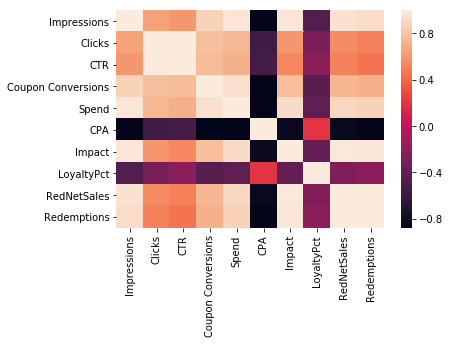

In [685]:
import seaborn as sns
corr = med_coup_avg.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

#### This shows the correlations between all metrics

In [686]:
corr

,Impressions,Clicks,CTR,Coupon Conversions,Spend,CPA,Impact,LoyaltyPct,RedNetSales,Redemptions
Impressions,1.000000,0.654611,0.603754,0.880510,0.973640,-0.860782,0.975489,-0.473937,0.949549,0.932890
Clicks,0.654611,1.000000,0.995700,0.787024,0.746451,-0.557970,0.590562,-0.301924,0.550328,0.502321
CTR,0.603754,0.995700,1.000000,0.763838,0.709575,-0.535369,0.535960,-0.230622,0.502254,0.457162
Coupon Conversions,0.880510,0.787024,0.763838,1.000000,0.943688,-0.877229,0.777091,-0.444445,0.742226,0.718292
Spend,0.973640,0.746451,0.709575,0.943688,1.000000,-0.867475,0.924699,-0.408356,0.903924,0.876816
CPA,-0.860782,-0.557970,-0.535369,-0.877229,-0.867475,1.000000,-0.826274,0.203366,-0.838435,-0.856289
Impact,0.975489,0.590562,0.535960,0.777091,0.924699,-0.826274,1.000000,-0.379810,0.989460,0.975737
LoyaltyPct,-0.473937,-0.301924,-0.230622,-0.444445,-0.408356,0.203366,-0.379810,1.000000,-0.264271,-0.219185
RedNetSales,0.949549,0.550328,0.502254,0.742226,0.903924,-0.838435,0.989460,-0.264271,1.000000,0.993688
Redemptions,0.932890,0.502321,0.457162,0.718292,0.876816,-0.856289,0.975737,-0.219185,0.993688,1.000000


We see that there is __really strong positive correllation between all SSS metrics and media spend__, confirming that digital spend is responsible for bringing an increase to SSS metrics. 

Also note that loyalty percent behaves the same for GB as RB in that the higher the loyalty the lower the overall sales and redemptions. More loyalty means less sales.

Just like RB, GB shows that we should value net new customers more. However, to reach them we don't necessarily have to be lower funnel because impressions is the largest point of correllation.

### Measure performance proportions using sum table

In [687]:
med_coup_sum = pd.merge(left = med, right = coupon_sum, on = 'week')
med_coup_sum = med_coup_sum.set_index('week', drop = True)
med_coup_sum = med_coup_sum.astype('float64')
med_coup_sum = med_coup_sum.reset_index()
med_coup_sum

,week,Impressions,Clicks,CTR,Home Page Conversions,Coupon Conversions,Spend,CPA,Impact,LoyaltyPct,RedNetSales,Redemptions
0,2018-02-05,396384.0,661.0,0.001668,0.0,159.0,1343.648073,8.450617,0.007688,1.333333,722.11,15.0
1,2018-02-12,1298696.0,3986.0,0.003069,0.0,3167.0,7239.092872,2.285789,0.066179,1.523865,4086.47,146.0
2,2018-02-19,1257826.0,4204.0,0.003342,0.0,1630.0,7695.710497,4.621172,0.073564,1.802473,4888.87,165.0
3,2018-02-26,2045605.0,16684.0,0.008156,0.0,5941.0,14152.752435,2.176898,0.098407,1.077626,5443.32,173.0
4,2018-03-05,1911305.0,24428.0,0.012781,0.0,5470.0,13073.126651,2.110590,0.089751,1.540819,5182.62,179.0
5,2018-03-12,2116158.0,41510.0,0.019616,0.0,5942.0,14196.230857,2.090345,0.109161,1.114583,6005.45,196.0
6,2018-03-19,2157160.0,18655.0,0.008648,0.0,3911.0,12705.826361,3.122482,0.123884,1.254400,6656.67,220.0
7,2018-03-26,2027586.0,4661.0,0.002299,0.0,3737.0,11146.131721,2.981999,0.104897,0.986400,5824.56,203.0


Graph below highlights the strong positive relationship between spend and impact.

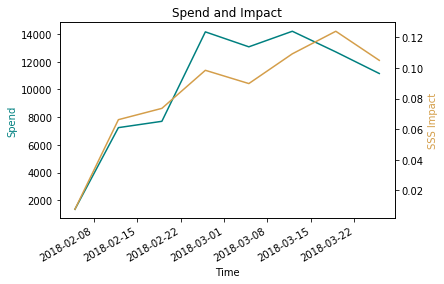

In [688]:
%matplotlib inline

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(med_coup_sum['week'], med_coup_sum['Spend'], '#008080')
ax2.plot(med_coup_sum['week'], med_coup_sum['Impact'], '#d49e4a')
ax1.set_xlabel('Time')
ax1.set_ylabel('Spend', color='#008080')
ax2.set_ylabel('SSS Impact', color='#d49e4a')
fig.autofmt_xdate()
plt.title('Spend and Impact')
plt.show()

Below highlights the negative correlation between redemptions and loyalty, further highlighting that we need to discount the value of the loyalty %

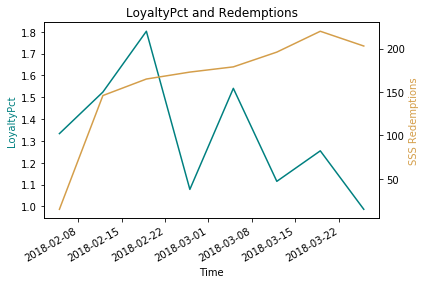

In [689]:
%matplotlib inline

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(med_coup_sum['week'], med_coup_sum['LoyaltyPct'], '#008080')
ax2.plot(med_coup_sum['week'], med_coup_sum['Redemptions'], '#d49e4a')
ax1.set_xlabel('Time')
ax1.set_ylabel('LoyaltyPct', color='#008080')
ax2.set_ylabel('SSS Redemptions', color='#d49e4a')
fig.autofmt_xdate()
plt.title('LoyaltyPct and Redemptions')
plt.show()

## Summary statement

In [690]:
aov = 44
x = 1385
y = med_coup_sum['Spend'].sum()
z = y/x
print(str(y) + ' / ' + str(x) + ' = ' + str(z) + ' spend per redemption driven')
tot = x*44
print('-----')
print('revenue brought in ' + str(tot))

81552.5194686 / 1385 = 58.8826855369 spend per redemption driven
-----
revenue brought in 60940


This analysis shows that for ever 58.88 dollars we spend we drive a redemption and considering an average order value of 44 dollars, we are losing 10.88 dollars per redemption. Meaning 81,552 media dollars were spent to drive only 60,940 dollars in incremental revenue. 

There is a direct correlation between spend and redemptions, but we are spending too much on media to bring in additional redemptions that drive our bottom line. A suggestion would be to move some of this money towards coupon redemption companies like Ibotta to help drive down spend per redemption.